In [2]:
import pandas as pd
import numpy as np

import seaborn as sns                   #visualize
import matplotlib.pyplot as plt         #visualize

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split



Skript for the BODMAS Dataset:

INPUT: 

    Dataset

Exploratory data analysis(EDA) -- Data inspection -- Data understanding

Data Visualization using Dimensionality reduction 

    Correlation Heatmap

    most important Features 

    Redundant Features 

Data Cleaning 

part of Data Preprocessing 

OUTPUT: 

    Data = X        Labels = y

Save to Folder Path: Data/prepared



Load Dataset into Pandas Dataframe

In [3]:
#load  BODMAS dataset 
df = pd.read_parquet ('raw_data/bodmas.parquet')
df.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F2376,F2377,F2378,F2379,F2380,F2381,Label,sha256,family,category
0,0.056742,0.008017,0.007762,0.005466,0.007762,0.004446,0.005430,0.003061,0.009475,0.006305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,None,benign
1,0.007062,0.004500,0.004498,0.004318,0.004410,0.004330,0.004265,0.004068,0.004391,0.004306,...,120.0,16564.0,0.0,0.0,0.0,0.0,0.0,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,None,benign
2,0.020975,0.004699,0.004002,0.004419,0.004214,0.003865,0.003973,0.004297,0.003921,0.004145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,None,benign
3,0.006482,0.003821,0.003788,0.003866,0.003734,0.003784,0.003884,0.003937,0.003805,0.003809,...,140.0,16384.0,0.0,0.0,0.0,0.0,0.0,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,None,benign
4,0.022135,0.003972,0.003834,0.003869,0.003759,0.003765,0.003777,0.003863,0.003773,0.003798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,None,benign


In [4]:
df.tail(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F2376,F2377,F2378,F2379,F2380,F2381,Label,sha256,family,category
134423,0.065420,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005619,0.004121,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,cd45d725bb2767af0d692717255e01fb9eff08b9733661...,autoit,trojan
134424,0.065421,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005617,0.004121,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,b65159911e73b6957196387ded28e08cd48aca846b9a70...,autoit,trojan
134425,0.142307,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002385,...,2180.0,585728.0,0.0,0.0,0.0,0.0,1.0,ca43a187fbf501fb4bfb90087d218e1e25a9dae04e4777...,autoit,trojan
134426,0.142308,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002386,...,2180.0,585728.0,0.0,0.0,0.0,0.0,1.0,966b6912b53844d28e7b9c4f2a43180c4123f4ce9aadb0...,wacatac,trojan
134427,0.142307,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002385,...,2180.0,585728.0,0.0,0.0,0.0,0.0,1.0,f40fcc084c321e37e44d73fa367e39c7b7db146e0e9a29...,autoit,trojan


In [5]:
df.shape

(134428, 2385)

In [6]:
#Semantik ändern

# Spalte 'family' analysieren
unique_families = df['family'].unique()
num_families = len(unique_families)
family_counts = df['family'].value_counts()

print(f"Anzahl Malware-Familien: {num_families}")
print("\nEinzigartige Malware-Familien:")
print(unique_families)

print("\nVerteilung der Familien:")
print(family_counts)

Anzahl Malware-Familien: 583

Einzigartige Malware-Familien:
[None 'autoit' 'sakurel' 'gupboot' 'juched' 'hpgandcrab' 'fuerboos'
 'noancooe' 'skeeyah' 'wacatac' 'mira' 'upatre' 'delfiles' 'ceeinject'
 'plugx' 'unruy' 'cambot' 'klez' 'mocrt' 'nitol' 'vb' 'small' 'simda'
 'sillyp2p' 'ditertag' 'padodor' 'dinwod' 'fakefolder' 'dofoil' 'mydoom'
 'urelas' 'qqpass' 'benjamin' 'gandcrab' 'gepys' 'fearso' 'wanna' 'dorv'
 'qlowzones' 'injector' 'qhosts' 'lolbot' 'wabot' 'ganelp' 'malex'
 'vobfus' 'systex' 'blocker' 'shifu' 'sytro' 'cuegoe' 'stration' 'occamy'
 'trojanx' 'tofsee' 'stormser' 'ainslot' 'vtflooder' 'sfone' 'picsys'
 'koceg' 'duptwux' 'simbot' 'obfuscator' 'autinject' 'socks' 'pluto'
 'cryptominer' 'plite' 'fuery' 'musecador' 'fareit' 'berbew' 'drolnux'
 'lunam' 'floxif' 'zbot' 'netwire' 'grandcrab' 'ursnif' 'msposer'
 'autorun' 'soltern' 'mofksys' 'carberp' 'laqma' 'skeeeyah' 'unwaders'
 'vflooder' 'yoddos' 'fasong' 'brontok' 'coinminer' 'onlinegames'
 'bladabindi' 'pwszbot' 'protu

checking types

In [7]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134428 entries, 0 to 134427
Columns: 2385 entries, F1 to category
dtypes: float32(2382), object(3)
memory usage: 1.2 GB


In [8]:
df.describe(include="O")

,sha256,family,category
count,134428,57286,134428
unique,134428,582,15
top,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,sfone,benign
freq,1,4729,77142


In [9]:
df.dtypes

F1          float32
F2          float32
F3          float32
F4          float32
F5          float32
             ...   
F2381       float32
Label       float32
sha256       object
family       object
category     object
Length: 2385, dtype: object

Dropping irrelevant columns


In [10]:
df = df.drop(['sha256', 'family', 'category'], axis=1)
#df.head(5)

Checking for duplicated rows

In [11]:
df.shape

(134428, 2382)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
F1,134428.0,1.726463e-01,1.904993e-01,1.268867e-04,0.018335,0.120495,0.250200,9.999828e-01
F2,134428.0,1.010071e-02,1.705067e-02,4.840046e-07,0.003932,0.006536,0.013533,9.880831e-01
F3,134428.0,6.500435e-03,6.990822e-03,2.765741e-07,0.003635,0.004372,0.007141,3.207031e-01
F4,134428.0,5.235379e-03,6.139305e-03,0.000000e+00,0.003149,0.003998,0.006340,3.432879e-01
F5,134428.0,6.897146e-03,8.296345e-03,0.000000e+00,0.003747,0.004731,0.008648,3.626143e-01
...,...,...,...,...,...,...,...,...
F2378,134428.0,3.951572e+05,3.066493e+07,0.000000e+00,0.000000,0.000000,0.000000,3.771926e+09
F2379,134428.0,6.478665e+05,3.782439e+07,0.000000e+00,0.000000,0.000000,0.000000,3.823243e+09
F2380,134428.0,1.250080e+07,1.492816e+08,0.000000e+00,0.000000,0.000000,0.000000,3.758097e+09
F2381,134428.0,4.993090e+05,3.673698e+07,0.000000e+00,0.000000,0.000000,0.000000,2.906326e+09


In [13]:
#for col in df.columns:
#    print(f"The total unique values in {col} are {len(df[col].unique())}")

In [14]:

#from plotly import express as px

#px.imshow(df.corr(),title="Correlation Plot of the Heat Failure Prediction")

In [15]:
'''
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())
plt.tight_layout()
plt.plot()
'''

'\nplt.figure(figsize=(15,10))\nsns.heatmap(df.corr())\nplt.tight_layout()\nplt.plot()\n'

In [16]:
'''
dur_df = df[df.duplicated()]
print("duplicate rows: ", dur_df.shape)
'''

'\ndur_df = df[df.duplicated()]\nprint("duplicate rows: ", dur_df.shape)\n'

In [17]:
df.count()

F1       134428
F2       134428
F3       134428
F4       134428
F5       134428
          ...  
F2378    134428
F2379    134428
F2380    134428
F2381    134428
Label    134428
Length: 2382, dtype: int64

checking missing or null values

In [18]:
#per feature
print(df.isnull().sum())

F1       0
F2       0
F3       0
F4       0
F5       0
        ..
F2378    0
F2379    0
F2380    0
F2381    0
Label    0
Length: 2382, dtype: int64


In [19]:
#of the total dataset
print(df.isnull().sum().sum())


0


Detect Outliers

<Axes: xlabel='F10'>

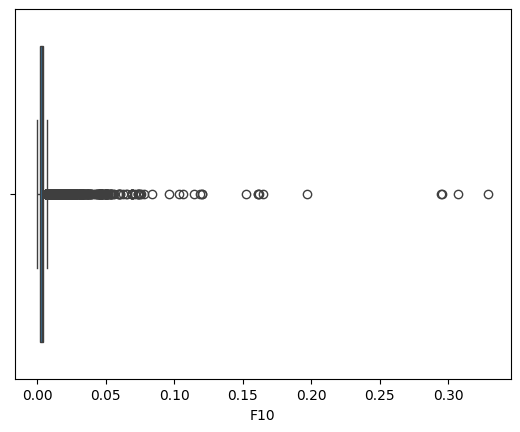

In [20]:
sns.boxplot(x=df['F10'])

<Axes: xlabel='F1800'>

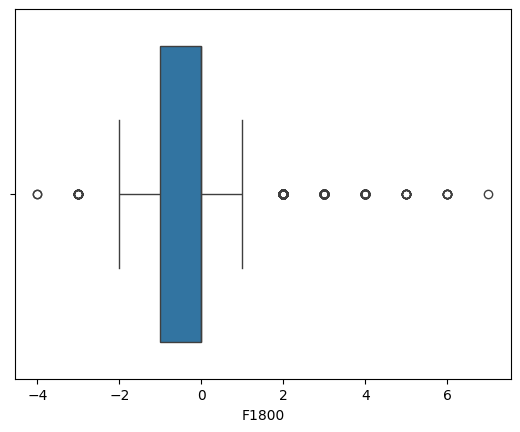

In [21]:

sns.boxplot(x=df['F1800'])


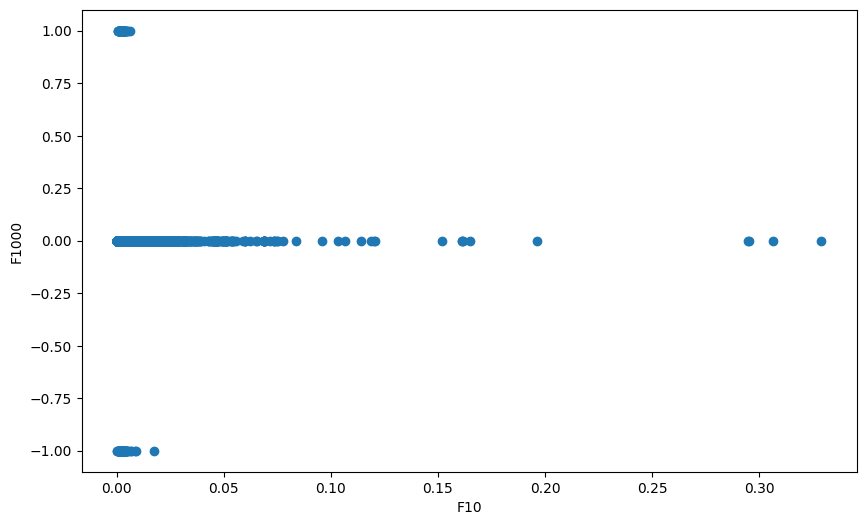

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['F10'], df['F1000'])
ax.set_xlabel('F10')
ax.set_ylabel('F1000')
plt.show()

Dim reduction for data vizualization

plot diffrent features against an other (scatter)
againt frequency(histogram)

Seperate the Labels from the Data

In [23]:

X = df.drop('Label', axis=1)
y = pd.DataFrame(df, columns = ['Label']) 

In [24]:
X

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F2372,F2373,F2374,F2375,F2376,F2377,F2378,F2379,F2380,F2381
0,0.056742,0.008017,0.007762,0.005466,0.007762,0.004446,0.005430,0.003061,0.009475,0.006305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007062,0.004500,0.004498,0.004318,0.004410,0.004330,0.004265,0.004068,0.004391,0.004306,...,0.0,0.0,0.0,0.0,120.0,16564.0,0.0,0.0,0.0,0.0
2,0.020975,0.004699,0.004002,0.004419,0.004214,0.003865,0.003973,0.004297,0.003921,0.004145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006482,0.003821,0.003788,0.003866,0.003734,0.003784,0.003884,0.003937,0.003805,0.003809,...,0.0,0.0,0.0,0.0,140.0,16384.0,0.0,0.0,0.0,0.0
4,0.022135,0.003972,0.003834,0.003869,0.003759,0.003765,0.003777,0.003863,0.003773,0.003798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134423,0.065420,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005619,0.004121,...,72.0,1160180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134424,0.065421,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005617,0.004121,...,72.0,1160180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134425,0.142307,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002385,...,64.0,674640.0,0.0,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0
134426,0.142308,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002386,...,64.0,674640.0,0.0,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0


In [25]:
y

,Label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
134423,1.0
134424,1.0
134425,1.0
134426,1.0


Dim Reduction PCA standard scaling


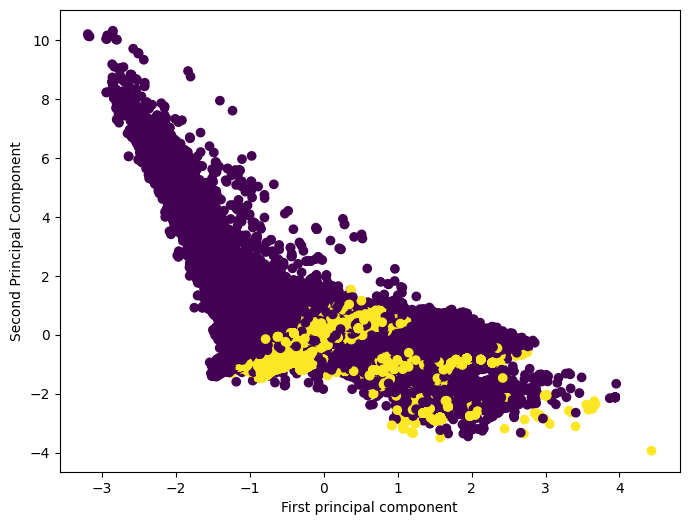

In [29]:
#PCA
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=3)
#scaler = StandardScaler()

X = pca.fit_transform(X)


plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

PCA mit minmacSclare

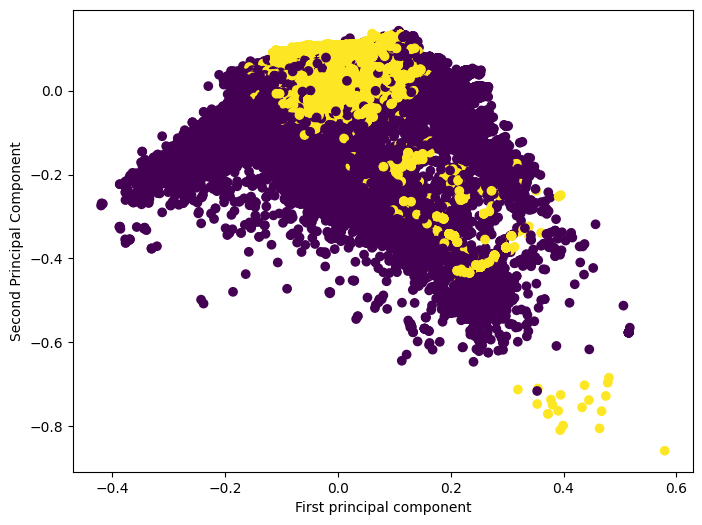

In [30]:
#PCA
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=3)
#scaler = StandardScaler()

X = pca.fit_transform(X)


plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

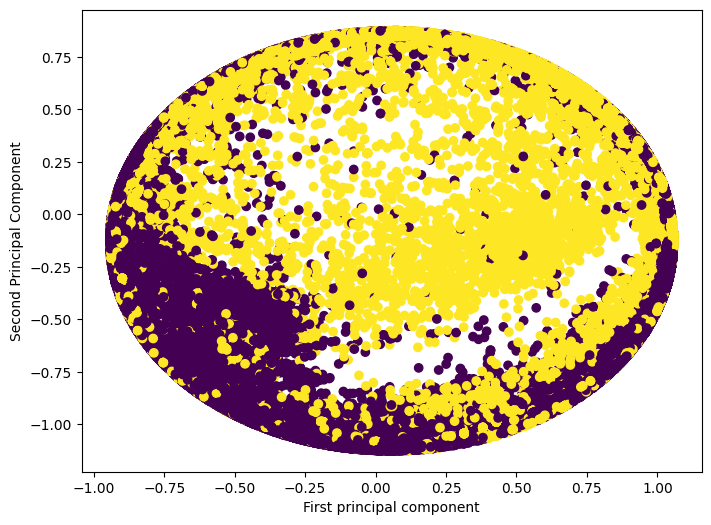

In [31]:
#PCA
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X = scaler.fit_transform(X)

pca = PCA(n_components=3)
#scaler = StandardScaler()

X = pca.fit_transform(X)


plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

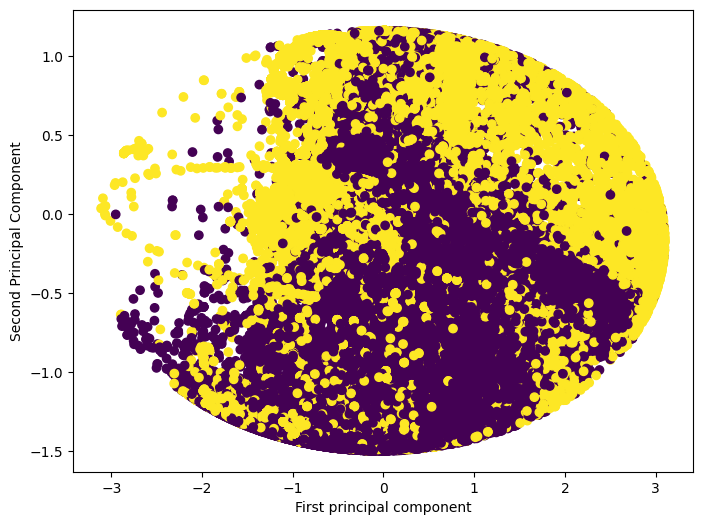

In [32]:
#PCA
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=3)
#scaler = StandardScaler()

X = pca.fit_transform(X)


plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

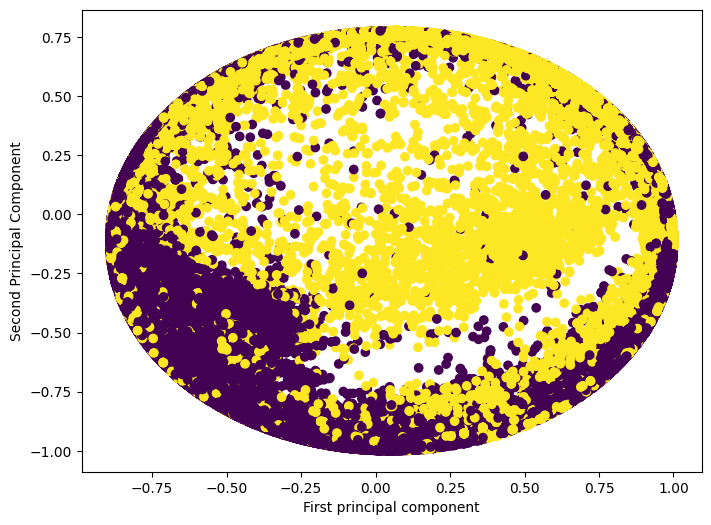

In [33]:
#PCA
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=3)
#scaler = StandardScaler()

X = pca.fit_transform(X)


plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

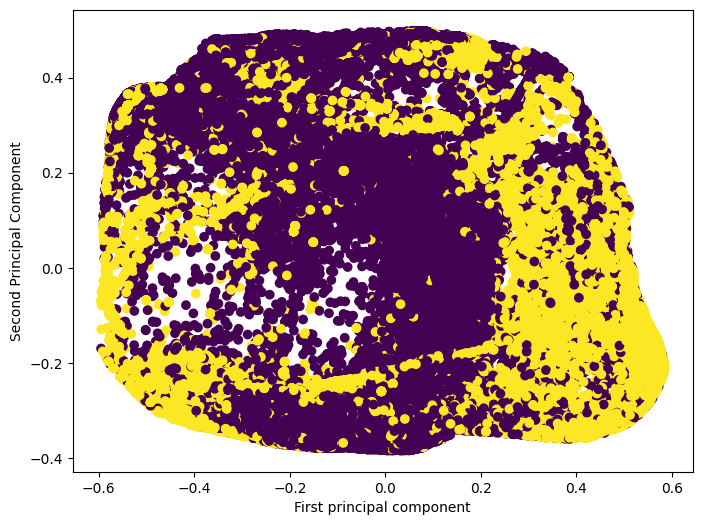

In [34]:
#PCA
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
X = scaler.fit_transform(X)

pca = PCA(n_components=3)
#scaler = StandardScaler()

X = pca.fit_transform(X)


plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

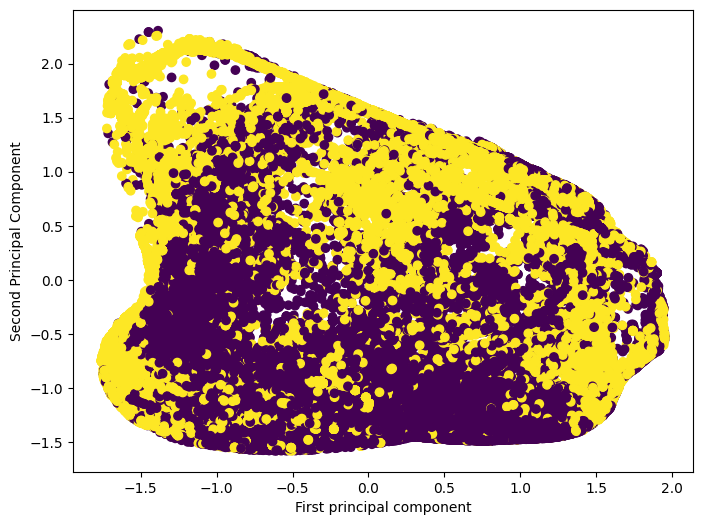

In [35]:
#PCA
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
X = scaler.fit_transform(X)

pca = PCA(n_components=3)
#scaler = StandardScaler()

X = pca.fit_transform(X)


plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

UMAP


In [ ]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Apply UMAP
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2)
X_umap = umap_model.fit_transform(X)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of Wine Dataset')
plt.colorbar()
plt.show()

/Users/leith/Documents/IT/B.s/Code/mwdfinal_backUp_15.10/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
#drop categorical features 
X = df.iloc[:,:2381]
y = df.iloc[:,2381]
print(X)


              F1        F2        F3        F4        F5        F6        F7  \
0       0.056742  0.008017  0.007762  0.005466  0.007762  0.004446  0.005430   
1       0.007062  0.004500  0.004498  0.004318  0.004410  0.004330  0.004265   
2       0.020975  0.004699  0.004002  0.004419  0.004214  0.003865  0.003973   
3       0.006482  0.003821  0.003788  0.003866  0.003734  0.003784  0.003884   
4       0.022135  0.003972  0.003834  0.003869  0.003759  0.003765  0.003777   
...          ...       ...       ...       ...       ...       ...       ...   
134423  0.065420  0.005993  0.005216  0.005492  0.005747  0.004183  0.005373   
134424  0.065421  0.005993  0.005216  0.005492  0.005747  0.004183  0.005373   
134425  0.142307  0.016379  0.010974  0.005991  0.009369  0.005670  0.003335   
134426  0.142308  0.016379  0.010974  0.005991  0.009369  0.005670  0.003335   
134427  0.142307  0.016379  0.010974  0.005991  0.009369  0.005670  0.003335   

              F8        F9       F10  .